Before importing the data from the previous step and the packages we need, we list some of the things we noted in the previous step which we need to deal with:
1. We noted that total value must be an estimation of the value of a home, and it did not necessarily resonate with how much a home might sell in a free market. Moreover, building value and land value did not add up to total value for more than 7000 rows, and they added up to sale price for only 51 homes. However, building value plus land value was consistently lower than or equal to total value and the maximum difference was nearly $582k. This indicated that, if there were not errors in data, sometimes there should be another factor contributing to total value of a home besides its land value and building value. We also observed outliers such as zeros associated with these variables, which we kept for further analysis. 
2. We observed that there were nearly 500 rows with duplicate address/sale date/property city, which could be different in terms of their sale price, land use, etc. Since these are important factors in modeling and these rows were only a small subset of our data, we decided we should drop all these rows because the discrepancies in sale price for the same property and the same date, for instance, indicated errors in data which could impact the modeling. However, we kept these rows because dealing with NaNs may resolve some of these duplicate rows.
3. We observed that more than half of our observations were missing values on a large number of attributes. A small portion of these data, however, were missing values on a smaller number of attributes. We kept all these rows for further analysis.
4. We observed that about 5000 rows were asscoiated with vacant land as land use, and some of them even had information on number of bedrooms, bathrooms, etc. We kept all these records for further analysis. We also observed that a small number of records were in MOBILE HOME and RESIDENTIAL COMBO/MISC categories. Mobile homes may not be appropriate to be used in the analysis especially because there is a very limited number of records associated with them. It was also unclear what exactly residential combo/misc meant. Resdiential combo/misc should probably be dissolved in other categories but it was not clear which category(ies) they should have been assigned to. So, it may be appropriate to drop these records. We however kept all these records for further analysis.
5. We observed that numerical variables included some outliers, which we need to analyze further.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
df = pd.read_csv('Nashville_Housing_Prices_DataWrangled.csv', index_col=0)

After importing the data, we first identify the traget or dependent variable. The dependent variable in our modeling is certainly going to be Sale Price, which should be based on a free market condition. So we need to address what we are going to do with Total Value, Building Value, and Land Value which should be directly correlated with Sale Price and represent the same information. We create a correlation matrix and a pair plot of these variables to better understand their relationship.

                Sale Price  Total Value  Land Value  Building Value
Sale Price        1.000000     0.702543    0.663738        0.606590
Total Value       0.702543     1.000000    0.800895        0.944481
Land Value        0.663738     0.800895    1.000000        0.560861
Building Value    0.606590     0.944481    0.560861        1.000000


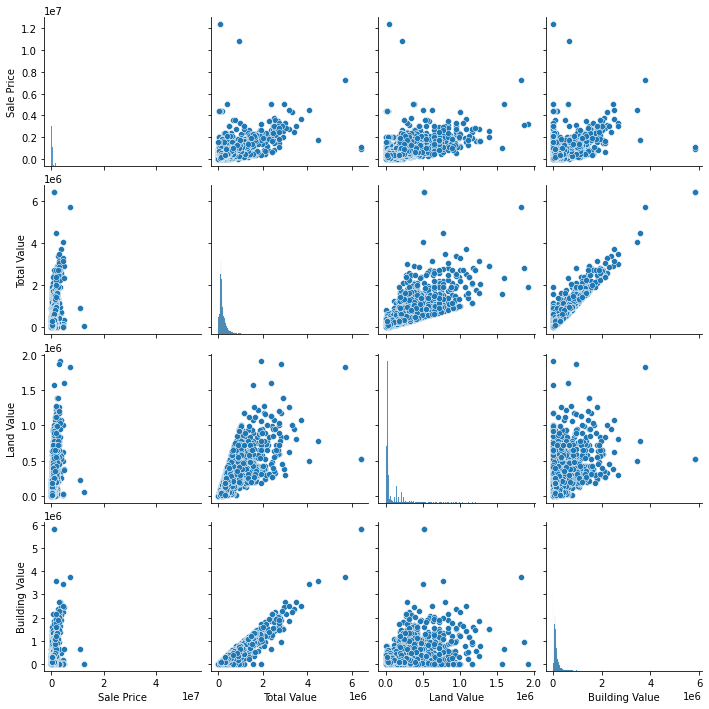

In [3]:
print(df[['Sale Price','Total Value','Land Value','Building Value']].corr())
sns.pairplot(df[['Sale Price','Total Value','Land Value','Building Value']])
plt.show()

We see that as expected there is a positive correlation between Sale Price and the other three variables. However, the scatterplots show that there are also some problems such as a very high/low Sale Price for a property with a very low/high Total Value. We also noted before the other problems associated with these variables. Overall, our modeling goal is to be able to predict a home's sale price in Nashville based on a free market and without having to have an appraisal for each individual home. Basically, if we are going to predict a home's sale price which is not included in our dataset, we should be able to do so without having an appraisal of the home's Total Value, Building Value, and Land Value. So, it seems appropriate to drop these columns.

In [4]:
df = df.drop(columns=['Total Value', 'Building Value', 'Land Value'])

In [5]:
df.columns

Index(['Parcel ID', 'Land Use', 'Property Address', 'Property City',
       'Sale Date', 'Sale Price', 'Legal Reference', 'Sold As Vacant',
       'Multiple Parcels Involved in Sale', 'State', 'Acreage', 'Tax District',
       'Neighborhood', 'Finished Area', 'Foundation Type', 'Year Built',
       'Exterior Wall', 'Grade', 'Bedrooms', 'Full Bath', 'Half Bath', 'Month',
       'Year', 'US Unemployment Rate', 'Nashville Unemployment Rate',
       'US Average Hourly Wage', 'Mortgage Rate'],
      dtype='object')

We next pay attention to whether the varibales have the correct data type and fix that if they don't. We then create histograms of some categorical/numerical variables to better underdtand their distributions.

In [6]:
for column in df.columns:
    print('datatype for', column, 'is:', df[column].dtype)

datatype for Parcel ID is: object
datatype for Land Use is: object
datatype for Property Address is: object
datatype for Property City is: object
datatype for Sale Date is: object
datatype for Sale Price is: int64
datatype for Legal Reference is: object
datatype for Sold As Vacant is: bool
datatype for Multiple Parcels Involved in Sale is: bool
datatype for State is: object
datatype for Acreage is: float64
datatype for Tax District is: object
datatype for Neighborhood is: float64
datatype for Finished Area is: float64
datatype for Foundation Type is: object
datatype for Year Built is: float64
datatype for Exterior Wall is: object
datatype for Grade is: object
datatype for Bedrooms is: float64
datatype for Full Bath is: float64
datatype for Half Bath is: float64
datatype for Month is: object
datatype for Year is: int64
datatype for US Unemployment Rate is: float64
datatype for Nashville Unemployment Rate is: float64
datatype for US Average Hourly Wage is: float64
datatype for Mortgage R

In [7]:
df['Land Use'] = df['Land Use'].astype('category')
df['Property City'] = df['Property City'].astype('category')
df['Tax District'] = df['Tax District'].astype('category')
df['Neighborhood'] = df['Neighborhood'].astype('category')
df['Foundation Type'] = df['Foundation Type'].astype('category')
df['Exterior Wall'] = df['Exterior Wall'].astype('category')
df['Grade'] = df['Grade'].astype('category')
df['Month'] = df['Month'].astype('category')
#df['Bedrooms'] = df['Bedrooms'].astype('int')
#df['Full Bath'] = df['Full Bath'].astype('int')
#df['Half Bath'] = df['Half Bath'].astype('int')

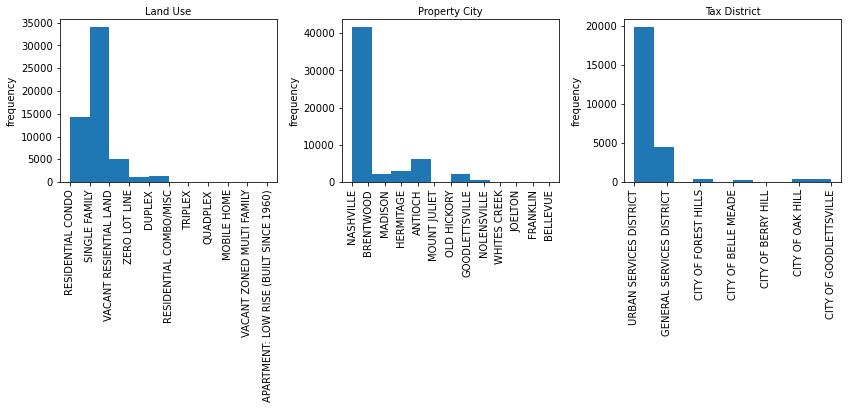

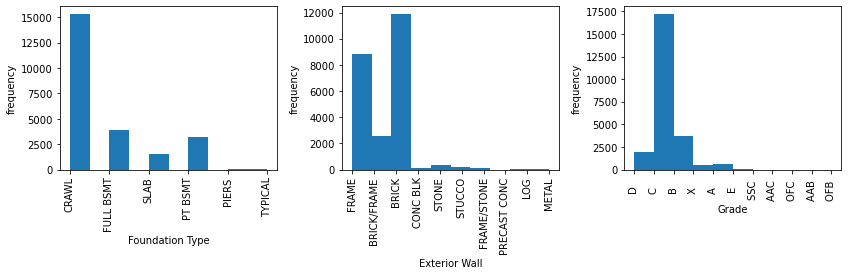

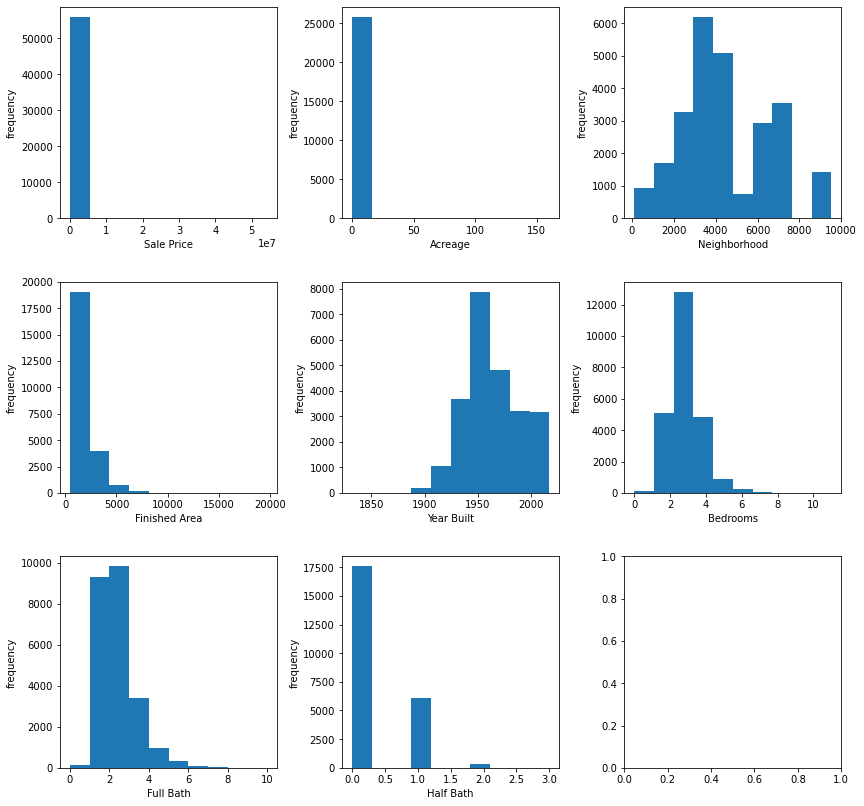

In [8]:
variables1 = ['Sale Price', 'Acreage', 'Neighborhood', 'Finished Area', 'Year Built', 'Bedrooms', 'Full Bath', 'Half Bath']
variables2 = ['Foundation Type', 'Exterior Wall', 'Grade']
variables3 = ['Land Use', 'Property City', 'Tax District']

fig, ax = plt.subplots(1,3, figsize=(14, 3))
fig.subplots_adjust(wspace=0.3)
j=0
for column in variables3:
    ax[j].hist(df[column].dropna())
    ax[j].set_xlabel(column)
    ax[j].xaxis.set_label_position('top')
    ax[j].set_ylabel('frequency')
    for tick in ax[j].get_xticklabels():
        tick.set_rotation(90)
    j = j + 1
plt.show()

fig, ax = plt.subplots(1,3, figsize=(14, 3))
fig.subplots_adjust(wspace=0.3)
j=0
for column in variables2:
    ax[j].hist(df[column].dropna())
    ax[j].set_xlabel(column)
    ax[j].set_ylabel('frequency')
    for tick in ax[j].get_xticklabels():
        tick.set_rotation(90)
    j = j + 1
plt.show()

fig, ax = plt.subplots(3,3, figsize=(14, 14))
fig.subplots_adjust(wspace=0.3, hspace=0.3)
i=0
j=0
for column in variables1:
    ax[i,j].hist(df[column].dropna())
    ax[i,j].set_xlabel(column)
    ax[i,j].set_ylabel('frequency')
    if j == 2:
        j = 0
        i = i + 1
    else:
        j = j + 1
plt.show()

We see that some other variables should have a different category too. For example bedrooms, full bath and half bath should be integers. However, since the data include NaNs, we can't change the categories for now. Moreover, we observe that some variables include outliers. We addressed this partially during data wrangling. Here, we further address this matter by looking at acreage, sale price, and finished area.

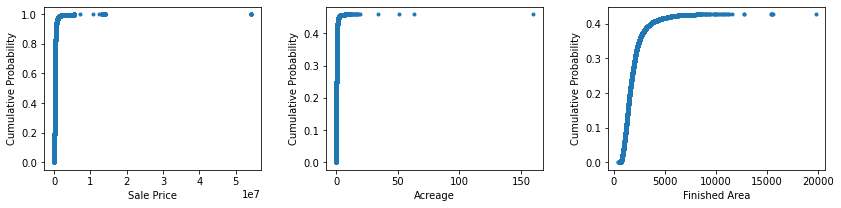

In [9]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

variables4 = ['Sale Price','Acreage', 'Finished Area']
x1, y1 = ecdf(df['Sale Price'])
x2, y2 = ecdf(df['Acreage'])
x3, y3 = ecdf(df['Finished Area'])
data = zip([x1, x2, x3], [y1, y2, y3], variables4)

fig, ax = plt.subplots(1,3, figsize=(14, 3))
fig.subplots_adjust(wspace=0.3)
j=0
for x, y, var in data:
    ax[j].plot(x, y, '.')
    ax[j].set_xlabel(var)
    ax[j].set_ylabel('Cumulative Probability')
    j = j + 1
plt.show()

               Sale Price   Acreage  Finished Area
Sale Price       1.000000  0.188859       0.711085
Acreage          0.188859  1.000000       0.404727
Finished Area    0.711085  0.404727       1.000000


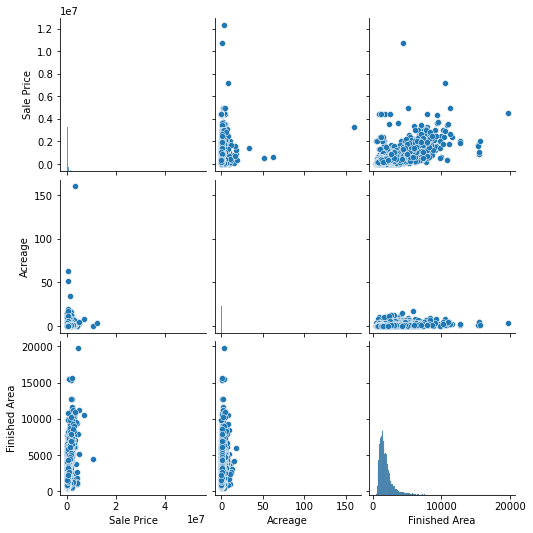

In [10]:
print(df[['Sale Price','Acreage', 'Finished Area']].corr())
sns.pairplot(df[['Sale Price','Acreage', 'Finished Area']])
plt.show()

In [11]:
df[df['Acreage'] > 20]

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,State,...,Grade,Bedrooms,Full Bath,Half Bath,Month,Year,US Unemployment Rate,Nashville Unemployment Rate,US Average Hourly Wage,Mortgage Rate
4788,163 00 0 122.00,VACANT RESIENTIAL LAND,0 BELL RD,ANTIOCH,2013-06-28,580000,20130702-0068071,True,False,TN,...,NaN,NaN,NaN,NaN,Jun,2013,7.5,6.8,20.12,4.46
16998,188 00 0 008.00,VACANT RESIENTIAL LAND,7211 CAROTHERS RD,NOLENSVILLE,2014-06-25,3235790,20140625-0055448,False,True,TN,...,NaN,NaN,NaN,NaN,Jun,2014,6.1,5.7,20.57,4.14
25224,128 00 0 181.00,VACANT RESIENTIAL LAND,OLD HICKORY BLVD,NASHVILLE,2014-12-24,500000,20141230-0118976,True,False,TN,...,NaN,NaN,0.0,0.0,Dec,2014,5.6,4.6,20.70,3.83
35179,076 01 0 083.00,VACANT RESIENTIAL LAND,0 LEBANON PIKE,HERMITAGE,2015-07-31,1450000,20150731-0076022,True,False,TN,...,NaN,NaN,NaN,NaN,Jul,2015,5.2,4.9,21.03,3.98


We see that there are some properties with very high acreages and relatively low sale prices given their size. They are all categorized as vacant residential land. This brings back the issue of the nearly 5000 rows asscoiated with vacant residential land as land use. 

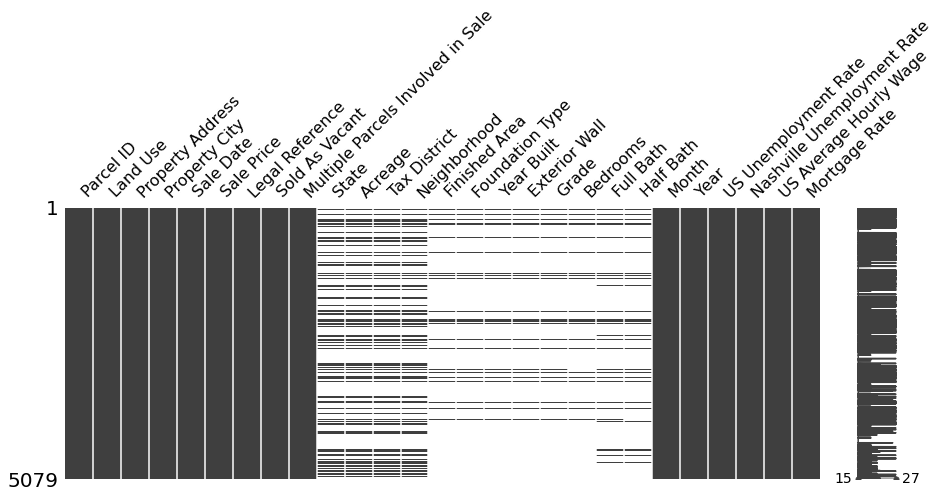

In [12]:
temp = df[df['Land Use'] == 'VACANT RESIENTIAL LAND']
msno.matrix(temp, figsize=(15, 5))
plt.show()

In [13]:
df[df['Land Use'] == 'VACANT RESIENTIAL LAND']['Acreage'].isna().sum()

3395

We see that most of these rows are missing data on several important columns such as acreage, which should be required to be able to predict a vacant land's sale price. So, even if we decided to include vacant residential land in our modeling, we have less than 2000 observations to work with. Moreover, it seems plausible not to include vacant land in our analysis because it has a completely different story than the rest of the data and might mislead the model. After all, our goal is to predict housing prices in Nashville. Another observation here is that a small number of these rows include information on things such as number of bedrooms and bathrooms. This may mean that these rows have mistakenly been put under vacant residential land. However, since there are only a very limited number of rows like this and we don't have enough information on them to put them under a different land use category, we decide to drop them along with the rest of the rows under vacant residential land.

In [14]:
df = df[df['Land Use'] != 'VACANT RESIENTIAL LAND']
df[df['Land Use'] == 'VACANT ZONED MULTI FAMILY'].shape

(2, 27)

We also drop the very few rows associated with 'VACANT ZONED MULTI FAMILY', which represent vacant land as well.

In [15]:
df = df[df['Land Use'] != 'VACANT ZONED MULTI FAMILY']

Now that we are dealing with land use categories, we also pay attention to RESIDENTIAL COMBO/MISC and MOBILE HOME, which we noted from data wrangling step.

In [16]:
print(df[df['Land Use'] == 'RESIDENTIAL COMBO/MISC'].shape)
print(df[df['Land Use'] == 'MOBILE HOME'].shape)

(95, 27)
(20, 27)


We see there is few number of rows associated with these land use categories. Since we don't know what RESIDENTIAL COMBO/MISC exactly represents, it seems appropriate to drop these rows. As for MOBILE HOME, we only have 20 observations and most of these rows are missing a lot of data. So we decide to drop them as well.

In [17]:
df = df[~df['Land Use'].isin(['RESIDENTIAL COMBO/MISC','MOBILE HOME'])]
df.shape

(50928, 27)

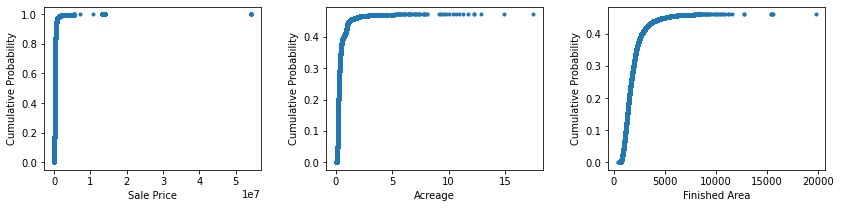

In [18]:
variables4 = ['Sale Price','Acreage', 'Finished Area']
x1, y1 = ecdf(df['Sale Price'])
x2, y2 = ecdf(df['Acreage'])
x3, y3 = ecdf(df['Finished Area'])
data = zip([x1, x2, x3], [y1, y2, y3], variables4)

fig, ax = plt.subplots(1,3, figsize=(14, 3))
fig.subplots_adjust(wspace=0.3)
j=0
for x, y, var in data:
    ax[j].plot(x, y, '.')
    ax[j].set_xlabel(var)
    ax[j].set_ylabel('Cumulative Probability')
    j = j + 1
plt.show()

Addressing irrelvant land use types seems to have addressed some of the outliers too. We now focus on the remaining outliers starting with sale price.

In [19]:
df[df['Sale Price'] > 20000000]

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,State,...,Grade,Bedrooms,Full Bath,Half Bath,Month,Year,US Unemployment Rate,Nashville Unemployment Rate,US Average Hourly Wage,Mortgage Rate
24863,093 13 0B 134.00,RESIDENTIAL CONDO,134.0 - 320 11TH AVE S,NASHVILLE,2014-12-17,54278060,20141217-0115478,False,True,NaN,...,NaN,NaN,NaN,NaN,Dec,2014,5.6,4.6,20.7,3.8
24871,093 13 0B 108.00,RESIDENTIAL CONDO,108.0 - 320 11TH AVE S,NASHVILLE,2014-12-17,54278060,20141217-0115478,False,True,NaN,...,NaN,NaN,NaN,NaN,Dec,2014,5.6,4.6,20.7,3.8
24875,093 13 0B 447.00,RESIDENTIAL CONDO,447.0 - 320 11TH AVE S,NASHVILLE,2014-12-17,54278060,20141217-0115478,False,True,NaN,...,NaN,NaN,NaN,NaN,Dec,2014,5.6,4.6,20.7,3.8
24883,093 13 0B 456.00,RESIDENTIAL CONDO,456.0 - 320 11TH AVE S,NASHVILLE,2014-12-17,54278060,20141217-0115478,False,True,NaN,...,NaN,NaN,NaN,NaN,Dec,2014,5.6,4.6,20.7,3.8
24892,093 13 0B 337.00,RESIDENTIAL CONDO,337.0 - 320 11TH AVE S,NASHVILLE,2014-12-17,54278060,20141217-0115478,False,True,NaN,...,NaN,NaN,NaN,NaN,Dec,2014,5.6,4.6,20.7,3.8
24893,093 13 0B 322.00,RESIDENTIAL CONDO,322.0 - 320 11TH AVE S,NASHVILLE,2014-12-17,54278060,20141217-0115478,False,True,NaN,...,NaN,NaN,NaN,NaN,Dec,2014,5.6,4.6,20.7,3.8
24901,093 13 0B 448.00,RESIDENTIAL CONDO,448.0 - 320 11TH AVE S,NASHVILLE,2014-12-17,54278060,20141217-0115478,False,True,NaN,...,NaN,NaN,NaN,NaN,Dec,2014,5.6,4.6,20.7,3.8


We see that there are seven rows associated with the same property but with different suite/condo numbers and parcel IDs. However, studying these rows further shows that everything else is the same including sale price. This probably means that because multiple parcels were included in the sale, the same property has been listed in our data seven times. This might be happening with part of our data so we investigate it further.

In [20]:
temp = df.drop(columns=['Property Address','Parcel ID'])
temp.duplicated().sum()

937

We see that if we do not consider property address and parcel ID columns, we have 937 duplicated rows. However, before we dive deeper into addressing these duplciates, we first pay attention to the missing values in our data as addressing them may help with duplicates as well. In the data wrangling step we saw that over 50% of our observations were missing data on several columns including some columns that may be quite important in the modeling. We decided to keep those rows to later decide whether we should drop them. Here we are making our analysis more focused so we pay attention to this matter to see if the columns associated with missing data are important enough for modeling that it is better to drop the associated rows. We start our investigation by analyzing correlations.

In [21]:
temp = df[['Sale Price','Acreage', 'Finished Area', 'Year Built', 'Bedrooms', 'Full Bath', 'Half Bath']]
print(temp.corr())

               Sale Price   Acreage  Finished Area  Year Built  Bedrooms  \
Sale Price       1.000000  0.334798       0.725323    0.051843  0.384724   
Acreage          0.334798  1.000000       0.405044    0.038839  0.207262   
Finished Area    0.725323  0.405044       1.000000    0.197491  0.600543   
Year Built       0.051843  0.038839       0.197491    1.000000  0.155552   
Bedrooms         0.384724  0.207262       0.600543    0.155552  1.000000   
Full Bath        0.566476  0.287748       0.760991    0.277126  0.606023   
Half Bath        0.260689  0.072332       0.344956    0.239970  0.185137   

               Full Bath  Half Bath  
Sale Price      0.566476   0.260689  
Acreage         0.287748   0.072332  
Finished Area   0.760991   0.344956  
Year Built      0.277126   0.239970  
Bedrooms        0.606023   0.185137  
Full Bath       1.000000   0.069927  
Half Bath       0.069927   1.000000  


It is clear that features such as bedrooms, bathrooms and finished area are important factors for modeling sale prices. Thus, since we don't have any information to reliably fill the missing values, we decide to drop the rows including missing values on important features.

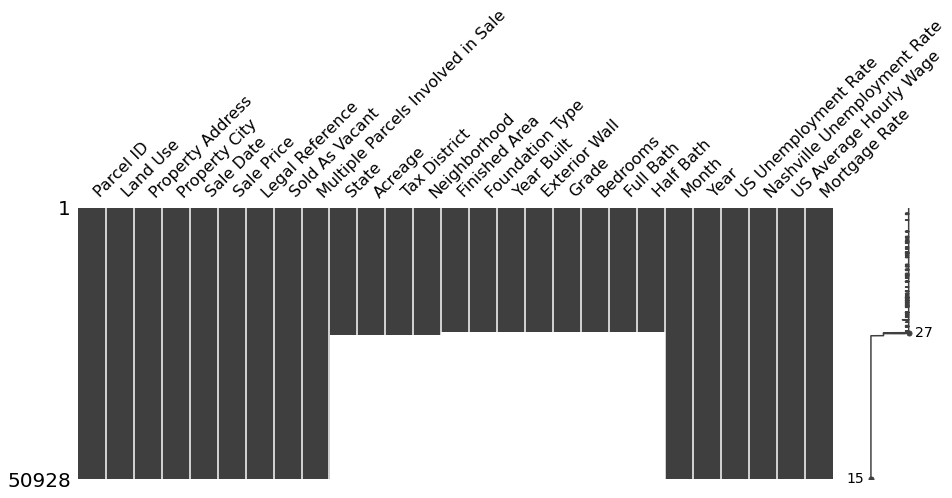

In [22]:
df1 = df.sort_values(['State','Finished Area'])
msno.matrix(df1, figsize=(15, 5))
plt.show()

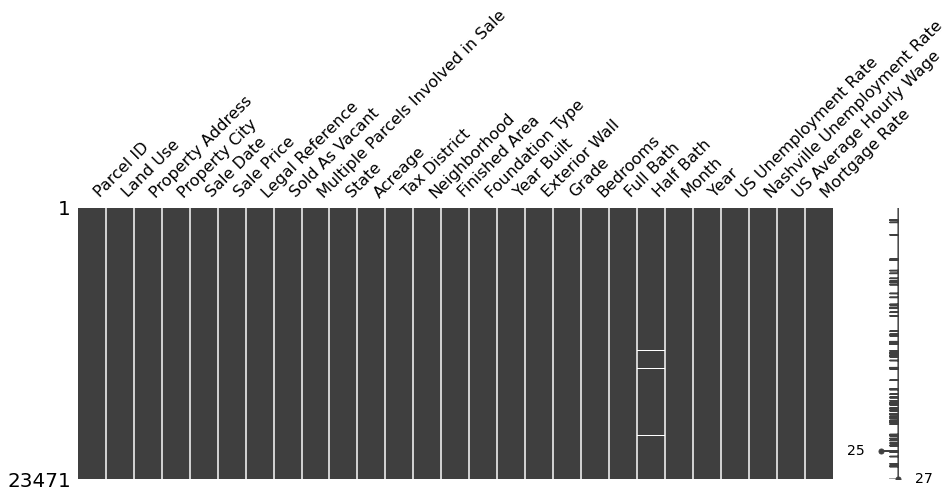

In [23]:
df = df[~df['Bedrooms'].isna()]
df1 = df.sort_values(['State','Finished Area'])
msno.matrix(df1, figsize=(15, 5))
plt.show()

In [24]:
df.isna().sum()

Parcel ID                              0
Land Use                               0
Property Address                       0
Property City                          0
Sale Date                              0
Sale Price                             0
Legal Reference                        0
Sold As Vacant                         0
Multiple Parcels Involved in Sale      0
State                                  0
Acreage                                0
Tax District                           0
Neighborhood                           0
Finished Area                          1
Foundation Type                        1
Year Built                             0
Exterior Wall                          0
Grade                                  0
Bedrooms                               0
Full Bath                              1
Half Bath                            108
Month                                  0
Year                                   0
US Unemployment Rate                   0
Nashville Unempl

We see there are still 108 rows with missing data on the number of half baths. It is likely that these values are actually zeros. We, however, leave dealing with these values for the next stage. There are also up to three rows with missing values on some other features. Since there are only very few of these rows, we drop them.

In [25]:
df = df[(~df['Finished Area'].isna())&(~df['Foundation Type'].isna())&(~df['Full Bath'].isna())]

We now return to the issue of duplicates.

In [26]:
temp = df.drop(columns=['Property Address','Parcel ID'])
temp.duplicated(keep=False).sum()

32

In [27]:
df[temp.duplicated(keep=False)].sort_values('Sale Date')

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,State,...,Grade,Bedrooms,Full Bath,Half Bath,Month,Year,US Unemployment Rate,Nashville Unemployment Rate,US Average Hourly Wage,Mortgage Rate
2374,072 14 0 417.00,DUPLEX,2506 NELDIA CT,NASHVILLE,2013-04-30,166000,20130517-0050152,False,True,TN,...,C,4.0,2.0,0.0,Apr,2013,7.6,6.0,20.04,3.35
2381,072 14 0 416.00,DUPLEX,2510 NELDIA CT,NASHVILLE,2013-04-30,166000,20130517-0050152,False,True,TN,...,C,4.0,2.0,0.0,Apr,2013,7.6,6.0,20.04,3.35
5185,071 14 0 397.00,ZERO LOT LINE,126 B FERN AVE,NASHVILLE,2013-07-03,150000,20130708-0070104,False,True,TN,...,C,2.0,1.0,1.0,Jul,2013,7.3,6.6,20.14,4.29
5186,071 14 0 396.00,ZERO LOT LINE,126 D FERN AVE,NASHVILLE,2013-07-03,150000,20130708-0070104,False,True,TN,...,C,2.0,1.0,1.0,Jul,2013,7.3,6.6,20.14,4.29
5187,071 14 0 394.00,ZERO LOT LINE,126 A FERN AVE,NASHVILLE,2013-07-03,150000,20130708-0070104,False,True,TN,...,C,2.0,1.0,1.0,Jul,2013,7.3,6.6,20.14,4.29
5200,071 14 0 087.00,ZERO LOT LINE,126 C FERN AVE,NASHVILLE,2013-07-03,150000,20130708-0070104,False,True,TN,...,C,2.0,1.0,1.0,Jul,2013,7.3,6.6,20.14,4.29
13785,043 09 0 061.00,DUPLEX,307 LOVELL ST,MADISON,2014-04-04,130000,20140408-0029161,False,True,TN,...,C,4.0,2.0,0.0,Apr,2014,6.2,4.7,20.52,4.41
13809,043 09 0 060.00,DUPLEX,309 LOVELL ST,MADISON,2014-04-04,130000,20140408-0029161,False,True,TN,...,C,4.0,2.0,0.0,Apr,2014,6.2,4.7,20.52,4.41
23626,071 07 0 257.00,SINGLE FAMILY,340 EDWIN ST,NASHVILLE,2014-11-14,170000,20141201-0109830,False,True,TN,...,D,3.0,1.0,1.0,Nov,2014,5.8,4.9,20.76,4.01
23636,071 08 0 268.00,SINGLE FAMILY,342 EDWIN ST,NASHVILLE,2014-11-14,170000,20141201-0109830,False,True,TN,...,D,3.0,1.0,1.0,Nov,2014,5.8,4.9,20.76,4.01


We see that for all the 32 duplicates, multiple parcels have been involved in the sale. So, it seems that the duplicates are the same sales records which have been repated in the dataset for different parcel IDs and/or addresses. Thus, it seems plausible to keep only one of the sales records and drop the duplicates.

In [28]:
df = df[~temp.duplicated()]

Now, we turn our attention to outliers again.

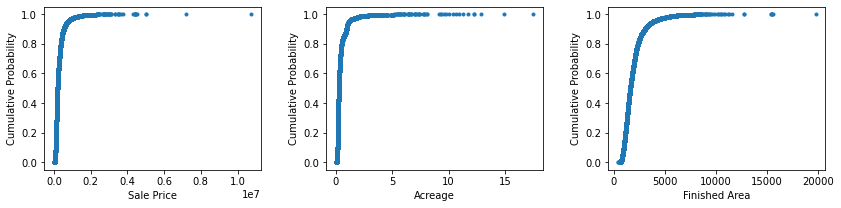

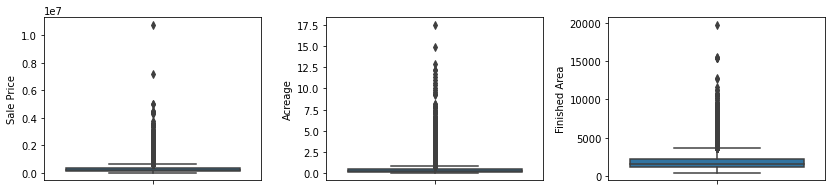

In [29]:
variables4 = ['Sale Price','Acreage', 'Finished Area']
x1, y1 = ecdf(df['Sale Price'])
x2, y2 = ecdf(df['Acreage'])
x3, y3 = ecdf(df['Finished Area'])
data = zip([x1, x2, x3], [y1, y2, y3], variables4)

fig, ax = plt.subplots(1,3, figsize=(14, 3))
fig.subplots_adjust(wspace=0.3)
j=0
for x, y, var in data:
    ax[j].plot(x, y, '.')
    ax[j].set_xlabel(var)
    ax[j].set_ylabel('Cumulative Probability')
    j = j + 1
plt.show()

fig, axs = plt.subplots(1,3, figsize=(14, 3))
fig.subplots_adjust(wspace=0.3)
j = 0
for var in variables4:
    sns.boxplot(ax = axs[j], y=var, data=df)
    axs[j].set(ylabel=var)
    j = j + 1

               Sale Price   Acreage  Finished Area
Sale Price       1.000000  0.336862       0.727231
Acreage          0.336862  1.000000       0.406079
Finished Area    0.727231  0.406079       1.000000


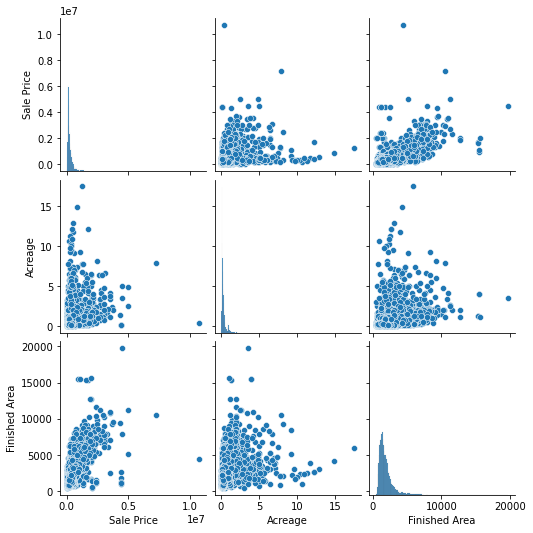

In [30]:
print(df[['Sale Price','Acreage', 'Finished Area']].corr())
sns.pairplot(df[['Sale Price','Acreage', 'Finished Area']])
plt.show()

In [31]:
pd.set_option('display.max_columns', 50)
df[df['Acreage'] > 10]

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,State,Acreage,Tax District,Neighborhood,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Month,Year,US Unemployment Rate,Nashville Unemployment Rate,US Average Hourly Wage,Mortgage Rate
4148,063 00 0 229.00,SINGLE FAMILY,1731 HUDSON RD,MADISON,2013-06-14,475000,20130618-0062386,False,False,TN,11.74,GENERAL SERVICES DISTRICT,6926.0,3929.23999,FULL BSMT,1997.0,BRICK,B,4.0,5.0,0.0,Jun,2013,7.5,6.8,20.12,3.98
24124,098 00 0 064.00,SINGLE FAMILY,3323 EARHART RD,MOUNT JULIET,2014-11-26,170300,20141201-0109639,False,False,TN,10.67,GENERAL SERVICES DISTRICT,6235.0,975.00000,CRAWL,1948.0,FRAME,D,2.0,1.0,0.0,Nov,2014,5.8,4.9,20.76,3.97
26505,127 13 0 033.00,SINGLE FAMILY,8421 ROLLING HILLS DR,NASHVILLE,2015-01-30,323000,20150211-0012605,False,False,TN,10.35,GENERAL SERVICES DISTRICT,6739.0,2320.50000,PT BSMT,1984.0,BRICK/FRAME,B,3.0,2.0,0.0,Jan,2015,5.7,5.2,20.80,3.66
27948,113 00 0 143.00,SINGLE FAMILY,8039 QUAIL CREEK RD,NASHVILLE,2015-03-23,825000,20150324-0025353,False,False,TN,14.90,GENERAL SERVICES DISTRICT,6736.0,4216.50000,CRAWL,2000.0,BRICK,B,3.0,2.0,1.0,Mar,2015,5.4,4.6,20.88,3.69
29877,051 07 0 043.00,SINGLE FAMILY,1020 GIBSON DR,MADISON,2015-05-01,525000,20150505-0040663,False,False,TN,12.87,GENERAL SERVICES DISTRICT,6928.0,3118.00000,PT BSMT,1925.0,STONE,B,4.0,4.0,0.0,May,2015,5.6,4.6,20.99,3.68
31748,168 00 0 079.00,SINGLE FAMILY,9005 HIGHWAY 100,NASHVILLE,2015-06-02,265000,20150605-0053035,False,False,TN,11.31,GENERAL SERVICES DISTRICT,6041.0,2520.00000,FULL BSMT,1966.0,BRICK,C,4.0,2.0,0.0,Jun,2015,5.3,5.1,21.01,3.87
32936,137 00 0 067.00,SINGLE FAMILY,3519 COUCHVILLE PIKE,HERMITAGE,2015-06-24,1200000,20150630-0062638,False,False,TN,17.50,GENERAL SERVICES DISTRICT,6247.0,5892.62000,CRAWL,2004.0,BRICK,A,5.0,5.0,2.0,Jun,2015,5.3,5.1,21.01,4.02
41591,142 00 0 106.00,SINGLE FAMILY,7037 HIGHWAY 70 S,NASHVILLE,2015-12-17,1700000,20151222-0128907,False,True,TN,12.20,GENERAL SERVICES DISTRICT,6751.0,2679.60004,PT BSMT,1954.0,BRICK,C,4.0,3.0,0.0,Dec,2015,5.0,3.7,21.24,3.97
41592,142 00 0 106.00,SINGLE FAMILY,7037 HIGHWAY 70 S,NASHVILLE,2015-12-17,400000,20151222-0128908,False,False,TN,12.20,GENERAL SERVICES DISTRICT,6751.0,2679.60004,PT BSMT,1954.0,BRICK,C,4.0,3.0,0.0,Dec,2015,5.0,3.7,21.24,3.97
55387,121 00 0 245.00,SINGLE FAMILY,2791 COUCHVILLE PIKE,NASHVILLE,2016-10-17,455000,20161020-0111147,False,False,TN,10.94,URBAN SERVICES DISTRICT,4132.0,2342.00000,FULL BSMT,1973.0,BRICK,C,3.0,4.0,0.0,Oct,2016,4.9,3.8,21.71,3.52


In [32]:
df[df['Finished Area'] > 10000]

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,State,Acreage,Tax District,Neighborhood,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Month,Year,US Unemployment Rate,Nashville Unemployment Rate,US Average Hourly Wage,Mortgage Rate
704,117 09 0 057.00,SINGLE FAMILY,2430 BEAR RD,NASHVILLE,2013-02-19,1700000,20130221-0017326,False,False,TN,1.33,URBAN SERVICES DISTRICT,3227.0,15378.00000,PT BSMT,1948.0,BRICK,X,10.0,10.0,0.0,Feb,2013,7.7,6.5,19.99,3.56
899,130 03 0 122.00,SINGLE FAMILY,540 JACKSON BLVD,NASHVILLE,2013-03-01,7200000,20130301-0020968,False,False,TN,7.88,CITY OF BELLE MEADE,9026.0,10519.29993,PT BSMT,1990.0,STONE,X,5.0,8.0,0.0,Mar,2013,7.5,6.2,20.01,3.51
5096,146 06 0 001.00,SINGLE FAMILY,907 OVERTON LEA RD,NASHVILLE,2013-07-01,2350000,20130703-0068603,False,True,TN,2.01,CITY OF OAK HILL,9529.0,11585.50000,PT BSMT,1909.0,BRICK,X,6.0,5.0,1.0,Jul,2013,7.3,6.6,20.14,4.29
6703,146 05 0 027.00,SINGLE FAMILY,914 OVERTON LEA RD,NASHVILLE,2013-08-15,2350000,20130816-0086539,False,True,TN,2.00,CITY OF OAK HILL,9529.0,10386.65012,PT BSMT,1993.0,BRICK,X,5.0,5.0,0.0,Aug,2013,7.2,6.3,20.17,4.40
9696,132 06 0 036.00,SINGLE FAMILY,4225 FRANKLIN PIKE,NASHVILLE,2013-11-15,905000,20131121-0120098,False,False,TN,4.00,CITY OF OAK HILL,9527.0,15446.00000,CRAWL,2016.0,STONE,X,5.0,5.0,2.0,Nov,2013,6.9,5.3,20.31,4.35
17705,144 13 0 011.00,SINGLE FAMILY,4333 CHICKERING LN,NASHVILLE,2014-07-10,2999000,20140711-0061259,False,False,TN,4.83,CITY OF FOREST HILLS,9226.0,10213.01013,FULL BSMT,1970.0,BRICK,X,6.0,6.0,1.0,Jul,2014,6.2,6.0,20.61,4.15
22473,117 09 0 057.00,SINGLE FAMILY,2430 BEAR RD,NASHVILLE,2014-10-20,1600000,20141022-0097588,False,False,TN,1.33,URBAN SERVICES DISTRICT,3227.0,15378.00000,PT BSMT,1948.0,BRICK,X,10.0,10.0,0.0,Oct,2014,5.7,4.9,20.70,3.92
22566,144 00 0 099.00,SINGLE FAMILY,22 BANCROFT PL,NASHVILLE,2014-10-22,2700000,20141024-0098442,False,False,TN,2.62,CITY OF FOREST HILLS,4440.0,11260.20984,FULL BSMT,2006.0,STUCCO,X,5.0,6.0,2.0,Oct,2014,5.7,4.9,20.70,3.92
23696,132 06 0 036.00,SINGLE FAMILY,4225 FRANKLIN PIKE,NASHVILLE,2014-11-17,1100000,20141118-0106332,False,False,TN,4.00,CITY OF OAK HILL,9527.0,15446.00000,CRAWL,2016.0,STONE,X,5.0,5.0,2.0,Nov,2014,5.8,4.9,20.76,3.99
27456,144 00 0 102.00,SINGLE FAMILY,34 BANCROFT PL,NASHVILLE,2015-03-09,5000000,20150310-0020538,False,True,TN,2.49,CITY OF FOREST HILLS,4440.0,11221.00000,PT BSMT,2005.0,STUCCO,X,5.0,4.0,3.0,Mar,2015,5.4,4.6,20.88,3.86


In [33]:
df[df['Sale Price'] > 5000000]

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,State,Acreage,Tax District,Neighborhood,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Month,Year,US Unemployment Rate,Nashville Unemployment Rate,US Average Hourly Wage,Mortgage Rate
899,130 03 0 122.00,SINGLE FAMILY,540 JACKSON BLVD,NASHVILLE,2013-03-01,7200000,20130301-0020968,False,False,TN,7.88,CITY OF BELLE MEADE,9026.0,10519.29993,PT BSMT,1990.0,STONE,X,5.0,8.0,0.0,Mar,2013,7.5,6.2,20.01,3.51
4950,117 07 0 137.00,SINGLE FAMILY,3428 STOKESMONT RD,NASHVILLE,2013-06-28,10750000,20130701-0067385,False,False,TN,0.46,URBAN SERVICES DISTRICT,3727.0,4381.79999,PT BSMT,1953.0,BRICK,A,4.0,3.0,1.0,Jun,2013,7.5,6.8,20.12,4.46


Part of the outliers seem plausible. Although, we note that there are some properties with very large acreage and/or finished area which have low sale prices. Given the correlation between acreage and finished area with sale price, these rows might include errors. We, however, keep these rows for now and leave dealing with them further for the next stage.<br>
Another issue in the data we observe is rows with very low values for some of the features. We now address this issue.

In [34]:
df.describe()

,Sale Price,Acreage,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath,Year,US Unemployment Rate,Nashville Unemployment Rate,US Average Hourly Wage,Mortgage Rate
count,2.345100e+04,23451.000000,23451.000000,23451.000000,23451.000000,23451.000000,23344.000000,23451.000000,23451.000000,23451.000000,23451.000000,23451.000000
mean,2.756926e+05,0.444164,1892.613760,1962.673191,3.084346,1.879707,0.275703,2014.569826,5.827892,4.862530,20.856992,3.906926
std,3.017481e+05,0.603614,1071.948842,25.691663,0.841999,0.945276,0.481842,1.083712,0.925006,0.932144,0.502646,0.317592
min,1.000000e+02,0.040000,450.000000,1832.000000,0.000000,0.000000,0.000000,2013.000000,4.800000,3.400000,19.940000,3.340000
25%,1.259000e+05,0.190000,1229.000000,1948.000000,3.000000,1.000000,0.000000,2014.000000,5.000000,4.100000,20.500000,3.650000
50%,1.855000e+05,0.270000,1617.000000,1960.000000,3.000000,2.000000,0.000000,2015.000000,5.600000,4.900000,20.880000,3.910000
75%,3.250000e+05,0.450000,2195.687500,1980.000000,3.000000,2.000000,1.000000,2016.000000,6.600000,5.600000,21.310000,4.140000
max,1.075000e+07,17.500000,19728.249880,2017.000000,11.000000,10.000000,3.000000,2016.000000,8.000000,6.800000,21.710000,4.580000


In [35]:
df[df['Sale Price'] < 10000]

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,State,Acreage,Tax District,Neighborhood,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Month,Year,US Unemployment Rate,Nashville Unemployment Rate,US Average Hourly Wage,Mortgage Rate
17,041 11 0 011.00,SINGLE FAMILY,4021 DUMBARTON DR,NASHVILLE,2013-01-04,100,20130129-0009438,False,False,TN,0.78,GENERAL SERVICES DISTRICT,6829.0,1620.0,FULL BSMT,1958.0,BRICK,C,2.0,1.0,0.0,Jan,2013,8.0,6.8,19.94,3.34
731,081 11 0 237.00,SINGLE FAMILY,1751 16TH AVE N,NASHVILLE,2013-02-20,7000,20130225-0018387,False,False,TN,0.12,URBAN SERVICES DISTRICT,226.0,837.0,CRAWL,1920.0,FRAME,D,2.0,1.0,0.0,Feb,2013,7.7,6.5,19.99,3.56
3212,094 12 0 025.00,SINGLE FAMILY,239 TULIP HILL DR,NASHVILLE,2013-05-23,7250,20130530-0054214,True,False,TN,0.67,URBAN SERVICES DISTRICT,4129.0,1262.0,CRAWL,2013.0,BRICK/FRAME,C,3.0,2.0,0.0,May,2013,7.5,6.2,20.05,3.59
6636,081 11 0 370.00,TRIPLEX,1604 16TH AVE N,NASHVILLE,2013-08-13,8000,20130816-0086270,False,False,TN,0.19,URBAN SERVICES DISTRICT,226.0,1360.0,CRAWL,1945.0,CONC BLK,D,3.0,3.0,0.0,Aug,2013,7.2,6.3,20.17,4.40
7631,080 04 0 030.00,SINGLE FAMILY,3204 DOAK AVE,NASHVILLE,2013-09-10,8500,20130918-0098246,False,False,TN,0.20,URBAN SERVICES DISTRICT,3529.0,1548.0,CRAWL,2014.0,FRAME,C,3.0,2.0,0.0,Sep,2013,7.2,6.0,20.23,4.57
8541,091 14 0 015.00,SINGLE FAMILY,46 TWIN ST,NASHVILLE,2013-10-11,3000,20131015-0107626,False,False,TN,0.11,URBAN SERVICES DISTRICT,3329.0,1412.0,CRAWL,2014.0,FRAME,C,3.0,2.0,0.0,Oct,2013,7.2,5.9,20.25,4.23
8656,070 05 0 031.00,SINGLE FAMILY,2415 STIVERS ST,NASHVILLE,2013-10-15,100,20131016-0108113,False,False,TN,0.39,URBAN SERVICES DISTRICT,3528.0,1134.0,CRAWL,1920.0,FRAME,D,2.0,1.0,0.0,Oct,2013,7.2,5.9,20.25,4.28
13125,092 07 0 011.00,SINGLE FAMILY,2202 HERMOSA ST,NASHVILLE,2014-03-19,6000,20140321-0023621,False,False,TN,0.16,URBAN SERVICES DISTRICT,1129.0,1302.0,CRAWL,1920.0,FRAME,D,2.0,1.0,0.0,Mar,2014,6.7,5.3,20.50,4.32
17084,136 11 0 005.00,SINGLE FAMILY,108 BLUE MIST CT,NASHVILLE,2014-06-27,1000,20140717-0063174,False,False,TN,0.48,URBAN SERVICES DISTRICT,6026.0,1911.0,CRAWL,1968.0,BRICK,C,3.0,2.0,0.0,Jun,2014,6.1,5.7,20.57,4.14
20277,080 12 0 071.00,SINGLE FAMILY,3210 MEXICO DR,NASHVILLE,2014-08-29,7500,20140908-0082218,True,False,TN,0.18,URBAN SERVICES DISTRICT,3536.0,1204.0,CRAWL,2015.0,FRAME,C,3.0,2.0,0.0,Aug,2014,6.1,5.6,20.67,4.10


In [36]:
df[df['Full Bath'] == 0]

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,State,Acreage,Tax District,Neighborhood,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Month,Year,US Unemployment Rate,Nashville Unemployment Rate,US Average Hourly Wage,Mortgage Rate
1581,091 11 0 055.00,SINGLE FAMILY,5104 ILLINOIS AVE,NASHVILLE,2013-04-05,182000,20130412-0036515,False,False,TN,0.17,URBAN SERVICES DISTRICT,1113.0,1594.0,TYPICAL,1920.0,FRAME,SSC,0.0,0.0,0.0,Apr,2013,7.6,6.0,20.04,3.54
11101,092 06 0 421.00,SINGLE FAMILY,808 28TH AVE N,NASHVILLE,2013-12-30,17000,20140109-0002310,False,False,TN,0.06,URBAN SERVICES DISTRICT,1129.0,569.0,SLAB,1950.0,BRICK,E,2.0,0.0,0.0,Dec,2013,6.7,5.1,20.34,4.53
16184,160 00 0 292.00,SINGLE FAMILY,775 HILL RD,BRENTWOOD,2014-06-06,365000,20140611-0050977,True,False,TN,4.91,URBAN SERVICES DISTRICT,4027.0,4606.0,CRAWL,2016.0,BRICK,B,0.0,0.0,0.0,Jun,2014,6.1,5.7,20.57,4.14
19649,093 15 0 291.00,SINGLE FAMILY,1061 2ND AVE S,NASHVILLE,2014-08-22,30000,20140822-0076650,False,False,TN,0.10,URBAN SERVICES DISTRICT,1426.0,2000.0,CRAWL,2016.0,FRAME,B,2.0,0.0,0.0,Aug,2014,6.1,5.6,20.67,4.10
28191,103 04 0 310.00,SINGLE FAMILY,3831 SENTINEL DR,NASHVILLE,2015-03-27,274900,20150331-0027577,False,False,TN,0.29,URBAN SERVICES DISTRICT,1126.0,1026.0,CRAWL,1989.0,FRAME,C,1.0,0.0,0.0,Mar,2015,5.4,4.6,20.88,3.69
30188,092 04 0 308.00,APARTMENT: LOW RISE (BUILT SINCE 1960),1613 HERMAN ST,NASHVILLE,2015-05-07,2000000,20150508-0042350,False,True,TN,1.21,URBAN SERVICES DISTRICT,326.0,12740.0,TYPICAL,1958.0,BRICK,AAC,0.0,0.0,0.0,May,2015,5.6,4.6,20.99,3.80
30203,092 04 0 309.00,APARTMENT: LOW RISE (BUILT SINCE 1960),1601 HERMAN ST,NASHVILLE,2015-05-07,2000000,20150508-0042350,False,True,TN,1.13,URBAN SERVICES DISTRICT,326.0,15574.0,TYPICAL,1958.0,BRICK,AAC,0.0,0.0,0.0,May,2015,5.6,4.6,20.99,3.80
33282,082 09 0 037.00,SINGLE FAMILY,604 MONROE ST,NASHVILLE,2015-06-30,460000,20150702-0064346,False,False,TN,0.12,URBAN SERVICES DISTRICT,107.0,1989.0,TYPICAL,1899.0,BRICK,OFB,0.0,0.0,0.0,Jun,2015,5.3,5.1,21.01,4.08
53749,061 11 0 252.00,SINGLE FAMILY,1201 MCALPINE AVE,NASHVILLE,2016-09-13,250000,20160914-0096531,False,False,TN,0.99,URBAN SERVICES DISTRICT,7328.0,664.0,CRAWL,1928.0,FRAME,D,2.0,0.0,0.0,Sep,2016,5.0,4.0,21.64,3.50
55637,081 02 0 136.00,SINGLE FAMILY,1712 PECAN ST,NASHVILLE,2016-10-21,140000,20161025-0112480,False,False,TN,0.30,URBAN SERVICES DISTRICT,3326.0,1404.0,CRAWL,1910.0,FRAME,D,3.0,0.0,0.0,Oct,2016,4.9,3.8,21.71,3.52


In [37]:
df[df['Bedrooms'] == 0]

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,State,Acreage,Tax District,Neighborhood,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Month,Year,US Unemployment Rate,Nashville Unemployment Rate,US Average Hourly Wage,Mortgage Rate
1581,091 11 0 055.00,SINGLE FAMILY,5104 ILLINOIS AVE,NASHVILLE,2013-04-05,182000,20130412-0036515,False,False,TN,0.17,URBAN SERVICES DISTRICT,1113.0,1594.0,TYPICAL,1920.0,FRAME,SSC,0.0,0.0,0.0,Apr,2013,7.6,6.0,20.04,3.54
16184,160 00 0 292.00,SINGLE FAMILY,775 HILL RD,BRENTWOOD,2014-06-06,365000,20140611-0050977,True,False,TN,4.91,URBAN SERVICES DISTRICT,4027.0,4606.0,CRAWL,2016.0,BRICK,B,0.0,0.0,0.0,Jun,2014,6.1,5.7,20.57,4.14
30188,092 04 0 308.00,APARTMENT: LOW RISE (BUILT SINCE 1960),1613 HERMAN ST,NASHVILLE,2015-05-07,2000000,20150508-0042350,False,True,TN,1.21,URBAN SERVICES DISTRICT,326.0,12740.0,TYPICAL,1958.0,BRICK,AAC,0.0,0.0,0.0,May,2015,5.6,4.6,20.99,3.80
30203,092 04 0 309.00,APARTMENT: LOW RISE (BUILT SINCE 1960),1601 HERMAN ST,NASHVILLE,2015-05-07,2000000,20150508-0042350,False,True,TN,1.13,URBAN SERVICES DISTRICT,326.0,15574.0,TYPICAL,1958.0,BRICK,AAC,0.0,0.0,0.0,May,2015,5.6,4.6,20.99,3.80
33282,082 09 0 037.00,SINGLE FAMILY,604 MONROE ST,NASHVILLE,2015-06-30,460000,20150702-0064346,False,False,TN,0.12,URBAN SERVICES DISTRICT,107.0,1989.0,TYPICAL,1899.0,BRICK,OFB,0.0,0.0,0.0,Jun,2015,5.3,5.1,21.01,4.08
40308,070 06 0 041.00,SINGLE FAMILY,1110 W TRINITY LN,NASHVILLE,2015-11-19,2040000,20151130-0120429,False,True,TN,3.03,URBAN SERVICES DISTRICT,3527.0,480.0,PIERS,1940.0,FRAME,E,0.0,1.0,0.0,Nov,2015,5.1,3.9,21.20,3.97


Some of the data certainly looks plausible here. For example it is plausible to see a property with finished area of 480 have no bedrooms. However, some sale prices are incredibly low and the number of bedrooms and bathrooms seem to be missing rather than zero for some properties. We take a note of this but leave further analysis to the next stage.<br>
We noted at the beginning of this stage that there were nearly 500 rows with duplicate address/sale date/property city, which could be different in terms of their sale price, land use, etc. We noted that we should drop these rows but after dealing with NaNs. We now address this matter.

In [38]:
cond = df.duplicated(subset=['Property Address','Sale Date','Property City'],keep=False)
print(df[cond].shape)
df.head(7)

(152, 27)


,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,State,Acreage,Tax District,Neighborhood,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Month,Year,US Unemployment Rate,Nashville Unemployment Rate,US Average Hourly Wage,Mortgage Rate
1,091 07 0 171.00,SINGLE FAMILY,4806 KENTUCKY AVE,NASHVILLE,2013-01-02,50000,20130103-0001026,False,False,TN,0.17,URBAN SERVICES DISTRICT,1226.0,856.00000,CRAWL,1918.0,FRAME,D,3.0,1.0,0.0,Jan,2013,8.0,6.8,19.94,3.34
3,105 13 0 349.00,SINGLE FAMILY,924 WALDKIRCH AVE,NASHVILLE,2013-01-02,225000,20130107-0001749,False,False,TN,0.18,URBAN SERVICES DISTRICT,1626.0,736.00000,FULL BSMT,1940.0,FRAME,C,2.0,1.0,0.0,Jan,2013,8.0,6.8,19.94,3.34
4,136 14 0 036.00,SINGLE FAMILY,525 CASTLEGATE DR,NASHVILLE,2013-01-02,152000,20130110-0003190,False,False,TN,0.30,URBAN SERVICES DISTRICT,4291.0,2684.92999,FULL BSMT,1974.0,BRICK/FRAME,C,4.0,3.0,0.0,Jan,2013,8.0,6.8,19.94,3.34
6,159 00 0 261.00,SINGLE FAMILY,5442 GRANNY WHITE PIKE,BRENTWOOD,2013-01-02,1365000,20130104-0001158,False,False,TN,1.99,GENERAL SERVICES DISTRICT,6528.0,6079.00000,CRAWL,2006.0,BRICK,X,4.0,4.0,1.0,Jan,2013,8.0,6.8,19.94,3.34
9,075 11 0 189.00,ZERO LOT LINE,813 BRADLEY PL,HERMITAGE,2013-01-03,47025,20130128-0008570,False,False,TN,0.14,GENERAL SERVICES DISTRICT,6228.0,1088.00000,SLAB,1985.0,BRICK,C,3.0,1.0,1.0,Jan,2013,8.0,6.8,19.94,3.34
12,094 05 0 099.00,SINGLE FAMILY,919 S 14TH ST,NASHVILLE,2013-01-03,98000,20130107-0001696,False,False,TN,0.20,URBAN SERVICES DISTRICT,2328.0,704.00000,PT BSMT,1959.0,FRAME,D,2.0,1.0,0.0,Jan,2013,8.0,6.8,19.94,3.34
13,052 08 0 116.00,DUPLEX,1501 MEADOW BEND DR,MADISON,2013-01-03,89900,20130107-0001590,False,False,TN,0.24,GENERAL SERVICES DISTRICT,6926.0,1658.00000,CRAWL,1984.0,BRICK,C,4.0,2.0,0.0,Jan,2013,8.0,6.8,19.94,3.34


We see that addressing NaNs has addressed many of these duplicate properties with different sale prices, land uses, etc. Since a different sale price for the same property on the same date must be an error, for example, we drop the remaining 152 rows of this type.

In [39]:
cond = df.duplicated(subset=['Property Address','Sale Date','Property City'],keep=False)
df = df[~cond]

Another point to consider is to find out if neighborhood IDs have a relationship with the property city. 

In [40]:
cond = df['Property City'] == 'NASHVILLE'
print('NASHVILLE\n',df[cond]['Neighborhood'].unique())
cond = df['Property City'] == 'BRENTWOOD'
print('BRENTWOOD\n',df[cond]['Neighborhood'].unique())
cond = df['Property City'] == 'HERMITAGE'
print('HERMITAGE\n',df[cond]['Neighborhood'].unique())
cond = df['Property City'] == 'MADISON'
print('MADISON\n',df[cond]['Neighborhood'].unique())

NASHVILLE
 [1226.0, 1626.0, 4291.0, 2328.0, 6829.0, ..., 6626.0, 4061.0, 2211.0, 3829.0, 6744.0]
Length: 148
Categories (148, float64): [1226.0, 1626.0, 4291.0, 2328.0, ..., 4061.0, 2211.0, 3829.0, 6744.0]
BRENTWOOD
 [6528.0, 9226.0, 4027.0, 9530.0, 4056.0, 4026.0]
Categories (6, float64): [6528.0, 9226.0, 4027.0, 9530.0, 4056.0, 4026.0]
HERMITAGE
 [6228.0, 6233.0, 6229.0, 6235.0, 6239.0, 6251.0, 6247.0]
Categories (7, float64): [6228.0, 6233.0, 6229.0, 6235.0, 6239.0, 6251.0, 6247.0]
MADISON
 [6926.0, 6927.0, 6950.0, 6834.0, 6929.0, ..., 6928.0, 9327.0, 6911.0, 6932.0, 6941.0]
Length: 12
Categories (12, float64): [6926.0, 6927.0, 6950.0, 6834.0, ..., 9327.0, 6911.0, 6932.0, 6941.0]


C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\ProgramData\Anaconda3\lib\site-packag

We don't see a clear pattern here. We however note that the property city and neighborhood might be closely associated and we should keep an eye on this during the next stages.<br>
We end this EDA step by plotting a heatmap between features that are numerical. We note that we should study associations further later on by including categorical features that have descriptive values as well.

<AxesSubplot:>

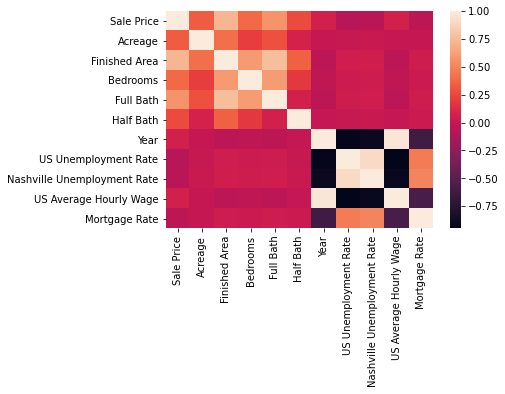

In [41]:
sns.heatmap(df[['Sale Price', 'Acreage',
       'Neighborhood', 'Finished Area', 'Bedrooms', 'Full Bath', 'Half Bath',
       'Year', 'US Unemployment Rate', 'Nashville Unemployment Rate',
       'US Average Hourly Wage', 'Mortgage Rate']].corr())

Correlations seen here are as expected. For example, we see a high correlation between sale price and factors such as finished area and number of bedrooms/bathrooms. We also see a negative correlation between unemployment rate and sale price. We will analyze these associations further in the next stage. We save the data for further analysis in the next stages.

In [42]:
df.to_csv('Nashville_Housing_Prices_EDAcompleted.csv')